In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
%matplotlib inline
#feature and dimension expand, why?
#what if we only use original features?
#Assume we have five orignal features: amt, paymtd, paytype, RecorPay, beneficiary
#dictionary for each feature is as following, all features are categorical data:
##Amt:0-9 (Amount of each txn)
##Paymtd:0-9 (payment method of each txn)
##Paytype:0-9 (payment type of each txn)
##RecorPay:0-9 (receive or pay type of each txn)
##bene:0-9 (beneficiary of each txn)

#suppose we have three class of txn as following:
##txn_class1:Amt always in bin 0
##txn_class1:Amt always in bin 5
##txn_class1:Amt always in bin 9
###We want to use our models to find such three kinds of txn_class
def txn_class1():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,1.0])[0] #feature amt will always be 9 in this class
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


def txn_class2():
    amt=np.random.choice(10,1,p=[1.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]#feature amt will always be 0 in this class
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

def txn_class3():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,1.0,
                                0.0,0.0,0.0,0.0,0.0])[0]#feature amt will always be 4 in this class
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


class Sythetic:
    def __init__(self):
        print('Sythetic instance created!')
        
    def Kmeans(self,data,K,plt):
        sse = {}
        t0=time()
        for k in tqdm(range(1, K+1)):
            kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
            sse[k] = kmeans.inertia_ 
        t1=time()
        plt.plot(list(sse.keys()), list(sse.values()))
        plt.set_title('Kmeans')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("SSE")
        print('Kmeans running time:%f sec!'%(t1-t0))
        return sse
        
    def SVD(self,data,K,plt):
        t0=time()
        svd=TruncatedSVD(n_components=K,n_iter=500,random_state=0)
        svd.fit(data)
        sigma=svd.singular_values_
        t1=time()
        x=[i for i in range(1,K+1)]
        plt.plot(x,sigma)
        plt.set_title('SVD')
        plt.set_xlabel("Singular Value Position")
        plt.set_ylabel("Singular Value")
        print('SVD running time:%f sec!'%(t1-t0))
        return sigma, svd.explained_variance_ratio_,svd.explained_variance_ratio_.sum()
        
    
    def PCA(self,data,K,plt):
        t0=time()
        pca = PCA(n_components=K)
        pca.fit(data)
        sigma=pca.singular_values_
        t1=time()
        x=[i for i in range(1,K+1)]
        plt.plot(x,sigma)
        plt.set_title('PCA')
        plt.set_xlabel("Singular Value Position")
        plt.set_ylabel("Singular Value")
        print('PCA running time:%f sec!'%(t1-t0))
        return sigma, pca.explained_variance_ratio_,pca.explained_variance_ratio_.sum()
        
    def NMF(self,data,K,plt):
        re = {}
        t0=time()
        for k in tqdm(range(1, K+1)):
            nmf = NMF(n_components=k, max_iter=1000).fit(data)
            re[k] = nmf.reconstruction_err_  
        t1=time()
        plt.plot(list(re.keys()), list(re.values()))
        plt.set_title('NMF')
        plt.set_xlabel("Number of cluster")
        plt.set_ylabel("Reconstruction-error")
        print('NMF running time:%f sec!'%(t1-t0))
        return re
    
    def Kmeans_pred(self,data,K,real_label):
        kmeans=KMeans(n_clusters=K,max_iter=1000)
        kmeans_pred=kmeans.fit_predict(data)
        conf_mat=confusion_matrix(real_label,kmeans_pred)
        return kmeans_pred,conf_mat
    
    def NMF_pred(self,data,K,real_label):
        nmf=NMF(n_components=K, max_iter=1000)
        W=nmf.fit_transform(data)
        nmf_pred=[np.argmax(i) for i in W]
        conf_mat=confusion_matrix(real_label,nmf_pred)
        return nmf_pred,conf_mat
    
s=Sythetic()

Sythetic instance created!


In [2]:
#generate data by above strategy
data=[txn_class1() for i in range(3000)]
data.extend([txn_class2() for i in range(3000)])
data.extend([txn_class3() for i in range(3000)])
#give each txn a label based on the txn generation strategy
real_label=[0]*3000
real_label.extend([1]*3000)
real_label.extend([2]*3000)

In [3]:
pd.DataFrame(data).head(3)

,0,1,2,3,4
0,9,6,7,9,1
1,9,4,3,8,7
2,9,3,7,1,4


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.20it/s]


Kmeans running time:0.706847 sec!
SVD running time:0.183484 sec!
PCA running time:0.013062 sec!


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.04it/s]


NMF running time:0.608617 sec!


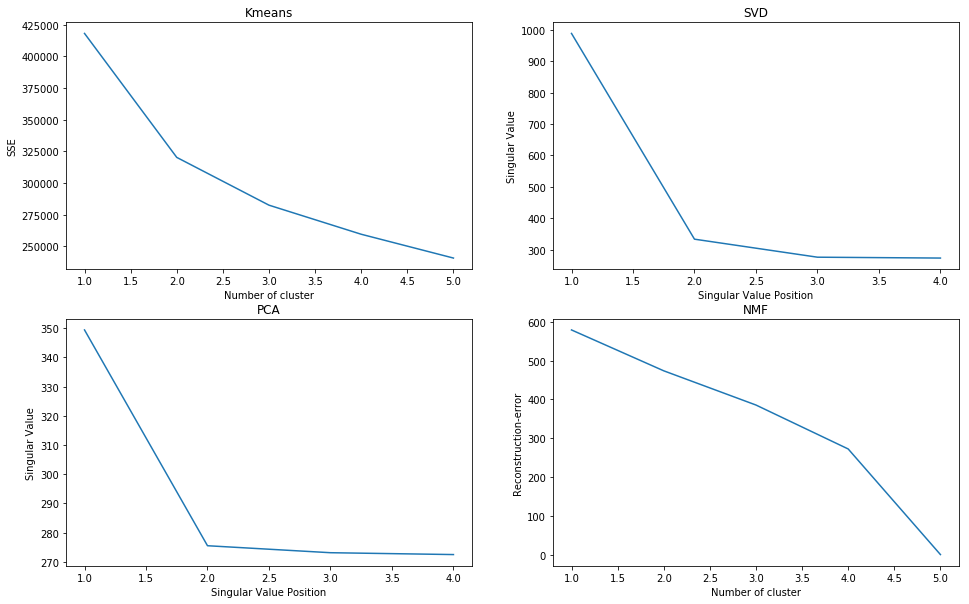

Kmeans, SVD, PCA support 2 class clustering but not correct, NMF is totally mess up!


In [4]:
###if we perform all models on the original data with original features
fig = plt.figure(figsize=(16,10))
ax1=fig.add_subplot(221)
s.Kmeans(data,5,ax1)
ax2=fig.add_subplot(222)
s.SVD(data,4,ax2)
ax3=fig.add_subplot(223)
s.PCA(data,4,ax3)
ax4=fig.add_subplot(224)
s.NMF(data,5,ax4)
plt.show()
print('Kmeans, SVD, PCA support 2 class clustering but not correct, NMF is totally mess up!')

In [5]:
### Dense matrix prediction######
print(s.Kmeans_pred(data,3,real_label)[1])
print('***********************')
print(s.NMF_pred(data,3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(PCA(3).fit_transform(data),3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(TruncatedSVD(3).fit_transform(data),3,real_label)[1])
print('very bad performance and no prediction power!')

[[3000    0    0]
 [   0 1474 1526]
 [   0 1515 1485]]
***********************
[[ 542 2159  299]
 [1851    0 1149]
 [1739  167 1094]]
***********************
[[   0 3000    0]
 [1503    0 1497]
 [1452    0 1548]]
***********************
[[3000    0    0]
 [   0 1514 1486]
 [   0 1418 1582]]
very bad performance and no prediction power!


In [6]:
#####perform feature expand by dummy######
data_df=pd.DataFrame(data)
data_dummy=pd.get_dummies(data_df,columns=[0,1,2,3,4])
data_dummy.head(3)

,0_0,0_4,0_9,1_0,1_1,1_2,1_3,1_4,1_5,1_6,...,4_0,4_1,4_2,4_3,4_4,4_5,4_6,4_7,4_8,4_9
0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:09<00:00,  1.05s/it]


Kmeans running time:9.542396 sec!
SVD running time:4.103861 sec!
PCA running time:0.042111 sec!


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.22s/it]


NMF running time:12.526331 sec!


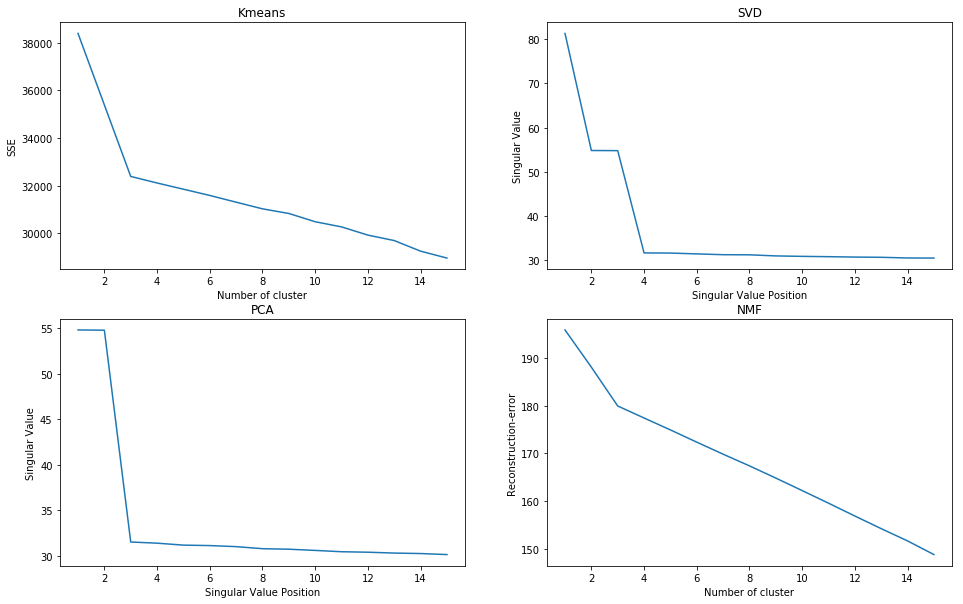

all models support 3 class clustering, SVD support both 3 and 4!


In [7]:
fig = plt.figure(figsize=(16, 10))
ax1=fig.add_subplot(221)
s.Kmeans(data_dummy,15,ax1)
ax2=fig.add_subplot(222)
s.SVD(data_dummy,15,ax2)
ax3=fig.add_subplot(223)
s.PCA(data_dummy,15,ax3)
ax4=fig.add_subplot(224)
s.NMF(data_dummy,15,ax4)
plt.show()
print('all models support 3 class clustering, SVD support both 3 and 4!')

In [8]:
### Sparse matrix prediction######
print(s.Kmeans_pred(data_dummy,3,real_label)[1])
print('***********************')
print(s.NMF_pred(data_dummy,3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(PCA(3).fit_transform(data_dummy),3,real_label)[1])
print('***********************')
print(s.Kmeans_pred(TruncatedSVD(3).fit_transform(data_dummy),3,real_label)[1])
print('all models gives exact correct clustering prediction! That is why we need feature expand and dimension increase!')

[[3000    0    0]
 [   0    0 3000]
 [   0 3000    0]]
***********************
[[   0    0 3000]
 [3000    0    0]
 [   0 3000    0]]
***********************
[[3000    0    0]
 [   0    0 3000]
 [   0 3000    0]]
***********************
[[   0 3000    0]
 [3000    0    0]
 [   0    0 3000]]
all models gives exact correct clustering prediction! That is why we need feature expand and dimension increase!


In [9]:
##################
##Simulation######
##################
#Now we use above method to generate sythetic data from a single txn to customers txn pool.
def txn_class1():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,1.0])[0] #feature amt will always be 9 in this class. 
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,  #this is single item pattern!
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

def txn_class2():
    amt=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0] 
    paymed=np.random.choice(10,1,p=[0.0,1.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paytype=np.random.choice(10,1,p=[0.0,1.0,0.0,0.0,0.0, #when paymed is 1, paytype will always be 1 as well.
                                0.0,0.0,0.0,0.0,0.0])[0]  #this is two-interactive iterms pattern
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

def txn_class3():
    amt=np.random.choice(10,1,p=[1.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0] #all features are 0, this is five-interactive items pattern!
    paymed=np.random.choice(10,1,p=[1.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paytype=np.random.choice(10,1,p=[1.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    RecorPay=np.random.choice(10,1,p=[1.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    bene=np.random.choice(10,1,p=[1.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    return [amt,paymed,paytype,RecorPay,bene]


def noisy():
    amt=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,  
                                0.1,0.1,0.1,0.1,0.1])[0] 
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,  
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

In [10]:
#generate data by above strategy
data=[txn_class1() for i in range(3000)]
data.extend([txn_class2() for i in range(3000)])
data.extend([txn_class3() for i in range(3000)])
data.extend([noisy() for i in range(3000)])
#give each txn a label based on the txn generation strategy
real_label=[0]*3000
real_label.extend([1]*3000)
real_label.extend([2]*3000)
real_label.extend([3]*3000)

In [11]:
#####perform feature expand with only single-feature dummy######
data_df=pd.DataFrame(data)
data_dummy=pd.get_dummies(data_df,columns=[0,1,2,3,4])
data_dummy.head(3)

,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,4_0,4_1,4_2,4_3,4_4,4_5,4_6,4_7,4_8,4_9
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:13<00:00,  1.52s/it]


Kmeans running time:13.778664 sec!
SVD running time:7.428766 sec!
PCA running time:0.054144 sec!


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  2.85s/it]


NMF running time:17.037334 sec!


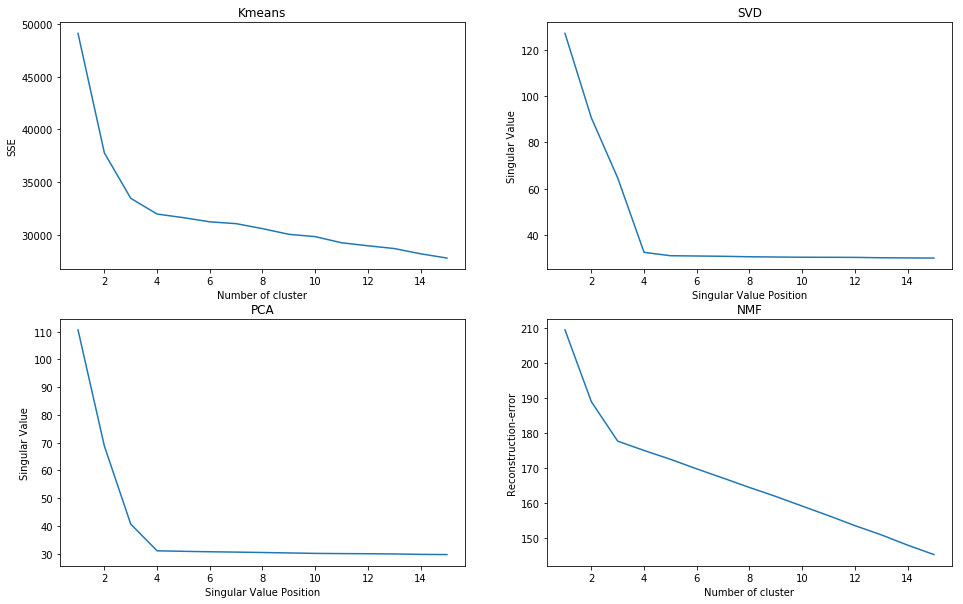

In [12]:
fig = plt.figure(figsize=(16, 10))
ax1=fig.add_subplot(221)
s.Kmeans(data_dummy,15,ax1)
ax2=fig.add_subplot(222)
s.SVD(data_dummy,15,ax2)
ax3=fig.add_subplot(223)
s.PCA(data_dummy,15,ax3)
ax4=fig.add_subplot(224)
s.NMF(data_dummy,15,ax4)
plt.show()

In [13]:
### Sparse matrix prediction######
print(s.Kmeans_pred(data_dummy,4,real_label)[1])
print('***********************')
print(s.NMF_pred(data_dummy,4,real_label)[1])
print('***********************')
print(s.Kmeans_pred(PCA(4).fit_transform(data_dummy),4,real_label)[1])
print('***********************')
print(s.Kmeans_pred(TruncatedSVD(4).fit_transform(data_dummy),4,real_label)[1])

[[   1    0   30 2969]
 [   0    0 3000    0]
 [3000    0    0    0]
 [  32 2646   32  290]]
***********************
[[   1   30 2969    0]
 [   0 3000    0    0]
 [3000    0    0    0]
 [ 129  307  290 2274]]
***********************
[[2969    1   30    0]
 [   0    0 3000    0]
 [   0 3000    0    0]
 [ 290   32   32 2646]]
***********************
[[2969    1   30    0]
 [   0    0 3000    0]
 [   0 3000    0    0]
 [ 290   32  154 2524]]


In [14]:
##let's see only boost features to 5-interactive items
data_dim_5=[[str(j) for j in i]for i in data]
data_dim_5=['_'.join(i) for i in data_dim_5]
data_dim_5

['9_1_2_8_4',
 '9_4_5_8_4',
 '9_0_8_9_3',
 '9_5_3_8_0',
 '9_0_1_7_9',
 '9_6_1_7_6',
 '9_9_8_3_4',
 '9_4_8_3_5',
 '9_0_1_3_2',
 '9_1_8_4_4',
 '9_0_7_1_6',
 '9_3_6_2_7',
 '9_2_9_7_8',
 '9_7_2_4_4',
 '9_1_0_6_6',
 '9_6_9_4_9',
 '9_5_7_2_7',
 '9_1_3_1_1',
 '9_8_6_5_2',
 '9_9_8_2_9',
 '9_9_2_0_8',
 '9_2_6_2_9',
 '9_9_0_2_9',
 '9_4_5_8_4',
 '9_0_8_2_0',
 '9_7_7_6_2',
 '9_3_9_0_2',
 '9_8_1_9_3',
 '9_9_2_2_3',
 '9_1_0_0_6',
 '9_1_8_6_1',
 '9_8_7_0_6',
 '9_3_9_5_1',
 '9_9_2_8_0',
 '9_0_4_8_5',
 '9_4_7_7_4',
 '9_9_7_0_8',
 '9_6_0_4_0',
 '9_6_6_8_5',
 '9_9_5_4_4',
 '9_6_2_0_3',
 '9_1_0_2_0',
 '9_8_8_9_8',
 '9_0_7_5_7',
 '9_5_1_6_4',
 '9_1_9_1_6',
 '9_1_8_1_5',
 '9_7_1_4_5',
 '9_2_1_0_9',
 '9_5_0_1_6',
 '9_5_1_9_8',
 '9_0_0_4_5',
 '9_3_2_3_0',
 '9_0_4_3_7',
 '9_5_7_6_6',
 '9_4_7_6_2',
 '9_6_5_1_6',
 '9_9_6_3_0',
 '9_4_9_8_9',
 '9_6_0_9_2',
 '9_4_5_5_0',
 '9_1_6_3_2',
 '9_1_1_3_2',
 '9_8_1_9_7',
 '9_8_6_2_5',
 '9_3_8_8_5',
 '9_5_6_0_5',
 '9_6_1_6_8',
 '9_0_9_4_7',
 '9_1_3_0_2',
 '9_3_6_1_8',
 '9_3_

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
count_mat=count.fit_transform(data_dim_5)
count_mat.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:13<00:00,  1.15it/s]


Kmeans running time:13.860883 sec!
SVD running time:6.864266 sec!
PCA running time:3.892322 sec!


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  1.14it/s]


NMF running time:5.791411 sec!


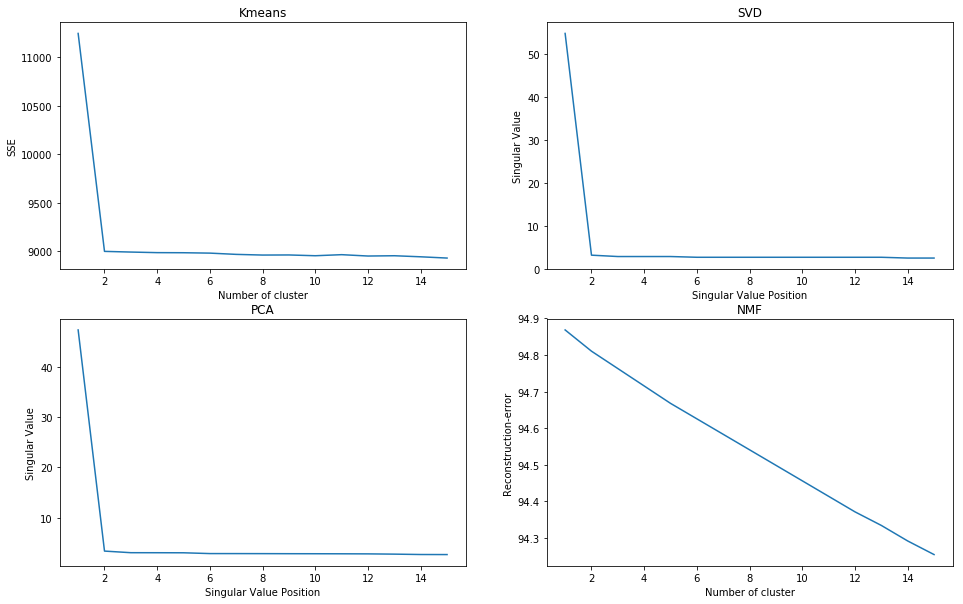

it is apparent that all model can not cluster correctly since five-items words only contain one pattern!


In [16]:
fig = plt.figure(figsize=(16, 10))
ax1=fig.add_subplot(221)
s.Kmeans(count_mat,15,ax1)
ax2=fig.add_subplot(222)
s.SVD(count_mat,15,ax2)
ax3=fig.add_subplot(223)
s.PCA(count_mat.toarray(),15,ax3)
ax4=fig.add_subplot(224)
s.NMF(count_mat,15,ax4)
plt.show()
print('it is apparent that all model can not cluster correctly since five-items words only contain one pattern!')

In [17]:
def pairwise(data):
    mat=[]
    for s in data:
        row=[]
        for i in range(len(s)-1):
            for j in range(i+1,len(s)):
                row.append(s[i]+'_'+s[j])
        mat.append(row)
    return mat

In [18]:
####feature expand by single-item, two-items and five-items!
data_dim_1=[[str(idx)+'_'+str(j) for idx,j in enumerate(i) ]for i in data]#one item boost
data_dim_2=pairwise(data_dim_1)
data_dim_1=np.array(data_dim_1)
data_dim_2=np.array(data_dim_2)
data_dim_full=np.append(data_dim_1,data_dim_2,axis=1)
data_dim_full=np.append(data_dim_full,[[i] for i in data_dim_5],axis=1)
data_dim_full

array([['0_9', '1_1', '2_2', ..., '2_2_4_4', '3_8_4_4', '9_1_2_8_4'],
       ['0_9', '1_4', '2_5', ..., '2_5_4_4', '3_8_4_4', '9_4_5_8_4'],
       ['0_9', '1_0', '2_8', ..., '2_8_4_3', '3_9_4_3', '9_0_8_9_3'],
       ...,
       ['0_4', '1_9', '2_0', ..., '2_0_4_2', '3_3_4_2', '4_9_0_3_2'],
       ['0_3', '1_7', '2_2', ..., '2_2_4_8', '3_2_4_8', '3_7_2_2_8'],
       ['0_3', '1_6', '2_0', ..., '2_0_4_5', '3_6_4_5', '3_6_0_6_5']],
      dtype='<U9')

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data_dim_full_sentence=[' '.join(i) for i in data_dim_full]
count_mat=count.fit_transform(data_dim_full_sentence)
count_mat.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:15<00:00, 34.96s/it]


Kmeans running time:255.739486 sec!
SVD running time:9.068130 sec!
PCA running time:3.777074 sec!


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.27s/it]


NMF running time:6.682757 sec!


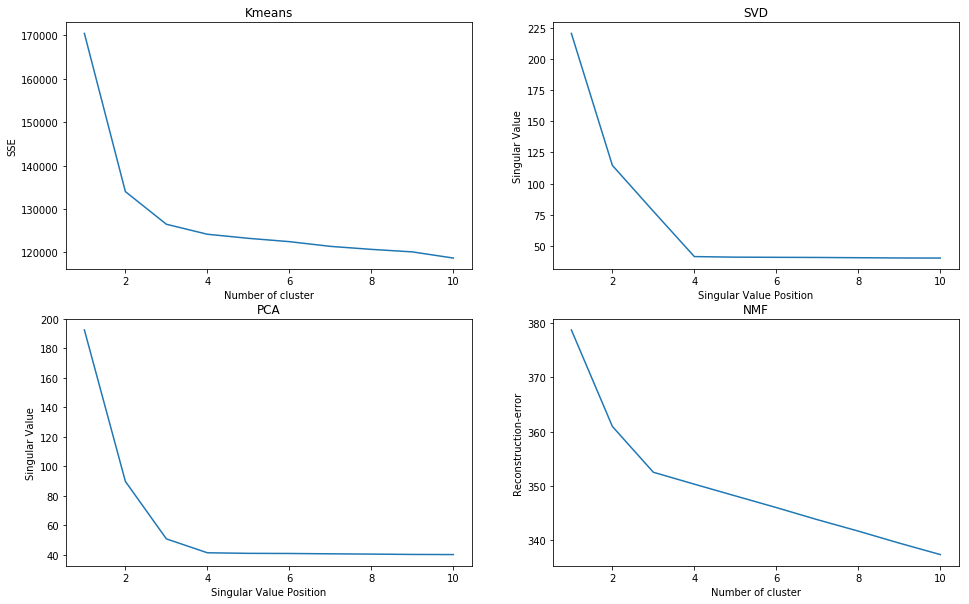

In [20]:
fig = plt.figure(figsize=(16, 10))
ax1=fig.add_subplot(221)
s.Kmeans(count_mat,10,ax1)
ax2=fig.add_subplot(222)
s.SVD(count_mat,10,ax2)
ax3=fig.add_subplot(223)
s.PCA(count_mat.toarray(),10,ax3)
ax4=fig.add_subplot(224)
s.NMF(count_mat,10,ax4)
plt.show()

In [22]:
### Sparse matrix prediction######
print(s.Kmeans_pred(count_mat,4,real_label)[1])
print('***********************')
print(s.NMF_pred(count_mat,4,real_label)[1])
print('***********************')
print(s.Kmeans_pred(PCA(4).fit_transform(count_mat.toarray()),4,real_label)[1])
print('***********************')
print(s.Kmeans_pred(TruncatedSVD(4).fit_transform(count_mat),4,real_label)[1])

[[   0    1   30 2969]
 [   0    0 3000    0]
 [   0 3000    0    0]
 [2677    1   32  290]]
***********************
[[   1   25 2834  140]
 [   0 2363    0  637]
 [3000    0    0    0]
 [ 176  414 1915  495]]
***********************
[[  30    1    0 2969]
 [3000    0    0    0]
 [   0 3000    0    0]
 [  32    1 2677  290]]
***********************
[[   1 2969   30    0]
 [   0    0 3000    0]
 [3000    0    0    0]
 [   1  290   32 2677]]
